Before even looking at the dataset from the challenge description it's obvious that we are facing a fraud detection problem and most of the labels should be False so I guess this is the main difficulty to handle the unbalanced dataset cause I've never solved a fraud detection challange before.

**UPLOADING DATA**:<br/>
As far as I know there is no way to upload the dataset permanently to google colab and the best solution is to mount my google drive which was not secure so for now I decided to upload the dataset from my PC everytime.


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving dataset.csv to dataset.csv


We should know nothing about the test set so let's split our data to train and test and then we can take a look at the training dataset.


In [ ]:
import pandas as pd

# show all columns while printing
pd.set_option('max_columns', None)

data = pd.read_csv("dataset.csv")
Y = data["isFraud"]
X = data.drop(columns=["isFraud"])

X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24855 entries, 0 to 24854
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     24855 non-null  object 
 1   ProId                  24855 non-null  object 
 2   ProCreationTimestamp   24855 non-null  int64  
 3   CustId                 24855 non-null  object 
 4   CustCreationTimestamp  24855 non-null  int64  
 5   Rate                   24855 non-null  int64  
 6   TaskCreationTimestamp  24855 non-null  int64  
 7   Price                  18866 non-null  float64
 8   ServiceId              24855 non-null  object 
 9   CategoryId             24855 non-null  object 
 10  ZoneId                 24855 non-null  object 
 11  TaskState              24855 non-null  object 
 12  TargetProId            2551 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 2.5+ MB


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='constant', fill_value="")
X[["TargetProId"]] = imputer.fit_transform(X[["TargetProId"]])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24855 entries, 0 to 24854
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     24855 non-null  object 
 1   ProId                  24855 non-null  object 
 2   ProCreationTimestamp   24855 non-null  int64  
 3   CustId                 24855 non-null  object 
 4   CustCreationTimestamp  24855 non-null  int64  
 5   Rate                   24855 non-null  int64  
 6   TaskCreationTimestamp  24855 non-null  int64  
 7   Price                  18866 non-null  float64
 8   ServiceId              24855 non-null  object 
 9   CategoryId             24855 non-null  object 
 10  ZoneId                 24855 non-null  object 
 11  TaskState              24855 non-null  object 
 12  TargetProId            24855 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 2.5+ MB


To change object columns to int, it's better to use **one hot encoder** for object columns but cause there will be so many features and we have  memory limit that's not possible as far as I know the best method is to use embedding So I wrote the below code but it didn't finish in a short time so unfortunateley I'll use ordinal encoder

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.manifold import LocallyLinearEmbedding
# import numpy as np

# enc = OneHotEncoder()
# a = enc.fit_transform(np.array(X["ProId"]).reshape(-1, 1))

# print(a.shape)

# embedding = LocallyLinearEmbedding(n_components=4)
# X_transformed = embedding.fit_transform(a.toarray())
# transformed.shape


Here are two problems after taking a notice at the dataset, **Price** and **TargetProId** have null values and many columns have the data type object. Though TargetProId has so many null values I prefer to keep it cause it's an important feature. I use median instead of null values for price.

The right thing to do is to create an object of **OrdinlaEncoder** and then use the fit_transform method of it for train dataset and just use its transform method on test dataset and to avoid error in case of unknown categories I put **handle_unknown** to **use_encoded_value** but apparantly this version of sickit that google colab is using doesn't support this argument so unfortunately I do this transformation on the whole dataset.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

pipeline = ColumnTransformer([
               ("string to num", OrdinalEncoder(), ["id", "ProId", "CustId", "ServiceId", "CategoryId", "ZoneId", "TaskState", "TargetProId"]),
])
transformed = pipeline.fit_transform(X)
X.loc[:, ["id",
"ProId",
"CustId", 
"ServiceId",
"CategoryId", 
"ZoneId",
"TaskState",
"TargetProId"]] = transformed

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24855 entries, 0 to 24854
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     24855 non-null  float64
 1   ProId                  24855 non-null  float64
 2   ProCreationTimestamp   24855 non-null  int64  
 3   CustId                 24855 non-null  float64
 4   CustCreationTimestamp  24855 non-null  int64  
 5   Rate                   24855 non-null  int64  
 6   TaskCreationTimestamp  24855 non-null  int64  
 7   Price                  18866 non-null  float64
 8   ServiceId              24855 non-null  float64
 9   CategoryId             24855 non-null  float64
 10  ZoneId                 24855 non-null  float64
 11  TaskState              24855 non-null  float64
 12  TargetProId            24855 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 2.5 MB


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19884 entries, 16083 to 13153
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19884 non-null  float64
 1   ProId                  19884 non-null  float64
 2   ProCreationTimestamp   19884 non-null  int64  
 3   CustId                 19884 non-null  float64
 4   CustCreationTimestamp  19884 non-null  int64  
 5   Rate                   19884 non-null  int64  
 6   TaskCreationTimestamp  19884 non-null  int64  
 7   Price                  15064 non-null  float64
 8   ServiceId              19884 non-null  float64
 9   CategoryId             19884 non-null  float64
 10  ZoneId                 19884 non-null  float64
 11  TaskState              19884 non-null  float64
 12  TargetProId            19884 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 2.1 MB


I'll split the training data into 'fraud' and 'not fraud' then I'll put the median price of each category instead of the null values. For the test data which I'm not aware of the labels I'll use the median of the training data

In [ ]:
import numpy as np

# the warning here is redundant because it doesn't know where the X_test and
# x_train are come from.
pipeline = ColumnTransformer([
               ("null price to median", SimpleImputer(strategy="median"), ["Price"]),
])

X_train.loc[Y_train == True, ["Price"]] = pipeline.fit_transform(X_train[Y_train == True])
X_train.loc[Y_train == False, ["Price"]] = pipeline.fit_transform(X_train[Y_train == False])

X_test.loc[:, "Price"].fillna(X_train["Price"].median(), inplace = True)

print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19884 entries, 16083 to 13153
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19884 non-null  float64
 1   ProId                  19884 non-null  float64
 2   ProCreationTimestamp   19884 non-null  int64  
 3   CustId                 19884 non-null  float64
 4   CustCreationTimestamp  19884 non-null  int64  
 5   Rate                   19884 non-null  int64  
 6   TaskCreationTimestamp  19884 non-null  int64  
 7   Price                  19884 non-null  float64
 8   ServiceId              19884 non-null  float64
 9   CategoryId             19884 non-null  float64
 10  ZoneId                 19884 non-null  float64
 11  TaskState              19884 non-null  float64
 12  TargetProId            19884 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 2.1 MB
None


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

Now we don't have null values anymore and each column data type is numeric but it's better to take a deeper look

In [ ]:
print(data.corr())

                       ProCreationTimestamp  CustCreationTimestamp      Rate  \
ProCreationTimestamp               1.000000               0.617041  0.046955   
CustCreationTimestamp              0.617041               1.000000  0.046121   
Rate                               0.046955               0.046121  1.000000   
TaskCreationTimestamp              0.683909               0.830052  0.023415   
Price                              0.025314               0.007409 -0.011246   
isFraud                            0.098349               0.056974  0.044544   

                       TaskCreationTimestamp     Price   isFraud  
ProCreationTimestamp                0.683909  0.025314  0.098349  
CustCreationTimestamp               0.830052  0.007409  0.056974  
Rate                                0.023415 -0.011246  0.044544  
TaskCreationTimestamp               1.000000  0.017791  0.042904  
Price                               0.017791  1.000000  0.058844  
isFraud                             0

CustCreationTimestamp and TaskCreationTimestamp have the correlation of 0.8 so I prefer to drop one of them.

In [ ]:
X_train = X_train.drop("TaskCreationTimestamp", axis=1)
X_test = X_test.drop("TaskCreationTimestamp", axis=1)

Another point to mention is that the range of each feature varies from others, it may cause trouble so we need to scale them.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# removes the mean and scales it to unit variance
pipeline = Pipeline([
    ("scaler", StandardScaler()),
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)


Now I think the dataset is almost ready to work with but it's better to have some visualization before starting, the dataset has many features and I cannot visualize more than two dimentions so I use two of them each time for visualizing.

In [ ]:
import matplotlib.pyplot as plt

f = X_train[Y_train == False]
t = X_train[Y_train]

I'll use "id" as axis x cause it's unique for every data point and other columns as axis y 

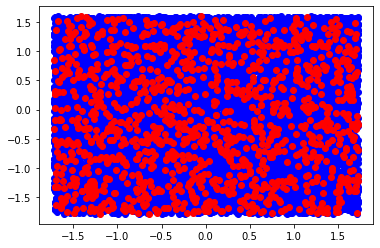

In [ ]:
# 0 stands for id and 1 stands for ProId
plt.scatter(f[:, 0], f[:, 1], c="blue")
plt.scatter(t[:, 0], t[:, 1], c="red")
plt.show()

From the plot I guess ProId makes no improvement in our accuracy

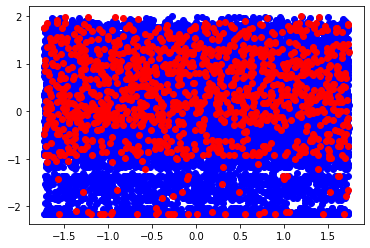

In [ ]:
# 0 stands for id and 2 stands for ProCreationTimestamp
plt.scatter(f[:, 0], f[:, 2], c="blue")
plt.scatter(t[:, 0], t[:, 2], c="red")
plt.show()

It seems that frauds have been more frequent through time

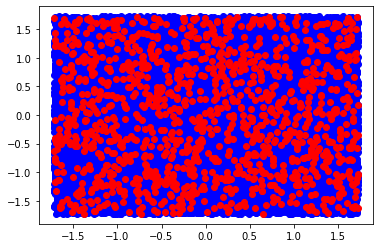

In [ ]:
# 0 stands for id and 3 stands for CustId
plt.scatter(f[:, 0], f[:, 3], c="blue")
plt.scatter(t[:, 0], t[:, 3], c="red")
plt.show()

From the plot I guess CustId makes no improvement in our accuracy

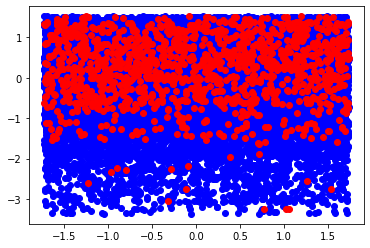

In [ ]:
# 0 stands for id and 4 stands for CustCreationTimestamp
plt.scatter(f[:, 0], f[:, 4], c="blue")
plt.scatter(t[:, 0], t[:, 4], c="red")
plt.show()

It seems that frauds have been more frequent through time

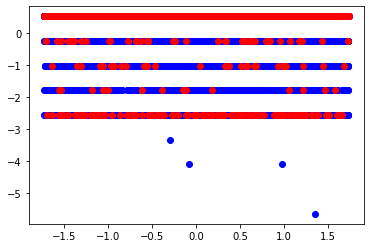

In [ ]:
# 0 stands for id and 5 stands for Rate
plt.scatter(f[:, 0], f[:, 5], c="blue")
plt.scatter(t[:, 0], t[:, 5], c="red")
plt.show()

As expected the fraud rates should be high rates but the plot in addition to high rates shows really low rates as fruad too :||

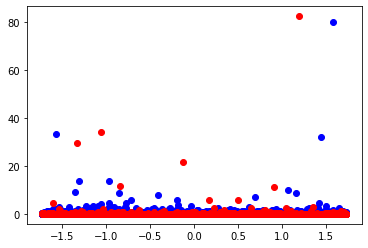

In [ ]:
# 0 stands for id and 6 stands for Price
plt.scatter(f[:, 0], f[:, 6], c="blue")
plt.scatter(t[:, 0], t[:, 6], c="red")
plt.show()

It seems that frauds have lower price

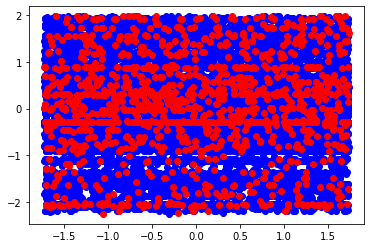

In [ ]:
# 0 stands for id and 7 stands for ServiceId
plt.scatter(f[:, 0], f[:, 7], c="blue")
plt.scatter(t[:, 0], t[:, 7], c="red")
plt.show()

I can see a little density

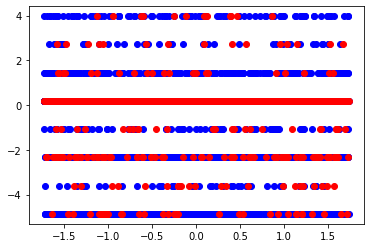

In [ ]:
# 0 stands for id and 8 stands for CategoryId
plt.scatter(f[:, 0], f[:, 8], c="blue")
plt.scatter(t[:, 0], t[:, 8], c="red")
plt.show()

Now I can see so much density

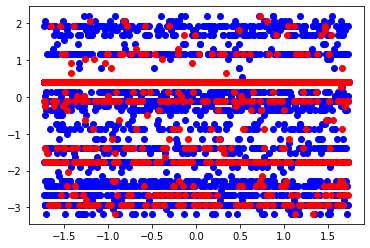

In [ ]:
# 0 stands for id and 9 stands for ZoneId
plt.scatter(f[:, 0], f[:, 9], c="blue")
plt.scatter(t[:, 0], t[:, 9], c="red")
plt.show()

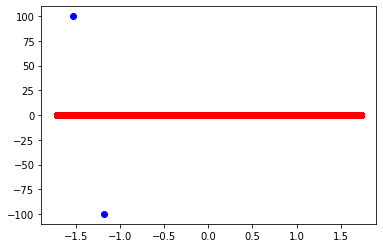

In [ ]:
# 0 stands for id and 10 stands for TaskState
plt.scatter(f[:, 0], f[:, 10], c="blue")
plt.scatter(t[:, 0], t[:, 10], c="red")
plt.show()

Id is just a unique token given to each request so it most probably won't help us and I want to drop it also TaskState doesn't seem to help and I tend to drop it.

In [ ]:
# id ProId CustId TaskState
X_train = a_del = np.delete(X_train, [0, 10], 1)
X_test = np.delete(X_test, [0, 10], 1)

Well, as I said this is a fruad detection task and most of the labels should be False

In [ ]:
print(np.bincount(Y_train))

[18622  1262]


We should have a unit to measure how well each model works. As the dataset is imbalanced both precision and recall are important so we can use F-score or ROC_AUC.<br/>
What will be the ROC_AUC if I predict every test sample as False?

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test, np.full(Y_test.shape, False))

0.5

So the models giving roc_auc more than 0.5 are resulting better probabilities than predicting just 100% False but may not label better at the end 

**SVM**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

svm_clf = LinearSVC(C=1.95, class_weight='balanced') 
svm_clf.fit(X_train, Y_train)
y_pred = svm_clf.predict(X_test)

print(accuracy_score(Y_test, y_pred))
print(precision_score(Y_test, y_pred))
print(recall_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))
roc_auc_score(Y_test, y_pred)

0.5902232951116475
0.09741176470588235
0.6349693251533742
0.1689106487148103


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.611026104987882

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, weights="distance")
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

print(accuracy_score(Y_test, y_pred))
print(precision_score(Y_test, y_pred))
print(recall_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))
roc_auc_score(Y_test, y_pred)

0.895996781331724
0.20249221183800623
0.19938650306748465
0.20092735703245748


0.5721367391548402

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
              {'criterion': ['gini', 'entropy'],
               'max_depth': [4, 6]}
]

tree_clf = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)
y_pred = grid_search.predict(X_test)

print(accuracy_score(Y_test, y_pred))
print(precision_score(Y_test, y_pred))
print(recall_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))
roc_auc_score(Y_test, y_pred)

{'criterion': 'gini', 'max_depth': 4}
0.8390665861999598
0.1409090909090909
0.2852760736196319
0.18864097363083163


0.5816046675956071

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

param_grid = [
              {'C': [2, 3, 4],
               'solver': ['lbfgs', 'liblinear']}
]

log_reg = LogisticRegression(class_weight='balanced', random_state=42)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)
y_pred = grid_search.predict(X_test)

print(accuracy_score(Y_test, y_pred))
print(precision_score(Y_test, y_pred))
print(recall_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))
roc_auc_score(Y_test, y_pred)

{'C': 3, 'solver': 'liblinear'}
0.5656809495071414
0.09320905459387484
0.6441717791411042
0.16285381930981002


0.6021720036717362

**Neural Network**

Building a neural network that performs well is usually a hard task and most of the time we use other researcher's networks but let's just give it a try.

In [ ]:
from tensorflow import keras
import tensorflow as tf

model = keras.models.Sequential([
    keras.layers.Dense(12, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(2, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=[tf.keras.metrics.AUC()])
history = model.fit(X_train, keras.utils.to_categorical(Y_train.to_numpy()), epochs=5)
y_pred = model.predict_classes(X_test)

print(accuracy_score(Y_test, y_pred))
print(precision_score(Y_test, y_pred))
print(recall_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))
roc_auc_score(Y_test, y_pred)

Epoch 1/5
622/622 [==============================] - 5s 4ms/step - loss: 0.5249 - auc: 0.9136
Epoch 2/5
622/622 [==============================] - 3s 4ms/step - loss: 0.2584 - auc: 0.9428
Epoch 3/5
622/622 [==============================] - 3s 4ms/step - loss: 0.2422 - auc: 0.9439
Epoch 4/5
622/622 [==============================] - 3s 4ms/step - loss: 0.2340 - auc: 0.9494
Epoch 5/5
622/622 [==============================] - 3s 4ms/step - loss: 0.2250 - auc: 0.9512


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9344196338764836
0.0
0.0
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5

The results are fraustrating, I want to test another approach, let's forget about the labels in the trining phase, I try to fit some guassian distributions on the training data with label False and then the test data which is placed in a low density will be considered as fraud 

0
1
2
3
4
5


<function matplotlib.pyplot.show>

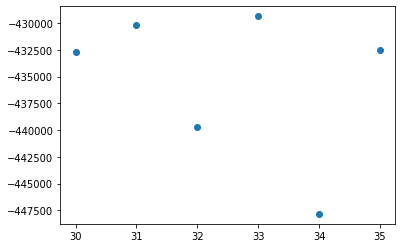

In [ ]:
from sklearn.mixture import GaussianMixture

real_data = X_train[Y_train == False]
n = range(30, 36)
bic = np.zeros(6)

for i,j in enumerate(n):
    print(i)
    gmm = GaussianMixture(n_components=j, n_init=5)
    gmm.fit(real_data)
    bic[i] = gmm.bic(real_data)

plt.scatter(n, bic)
plt.show

Considering the above plot I put number of distributions to 34.

In [ ]:
gm = GaussianMixture(n_components=34, n_init=10)
gm.fit(real_data)

densities = gm.score_samples(real_data)
density_threshold = np.percentile(densities, 5)
densities = gm.score_samples(X_test)

y_pred = np.array([densities < density_threshold])
y_pred = y_pred.reshape(-1, 1)

print(accuracy_score(Y_test, y_pred))
print(precision_score(Y_test, y_pred))
print(recall_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))
roc_auc_score(Y_test, y_pred)

0.8871454435727217
0.09897610921501707
0.08895705521472393
0.09369951534733441


0.5160608742166192

Let's use oversampling/undersapmling to balance the data

In [ ]:
# decision tree  on imbalanced dataset with SMOTE oversampling and random undersampling
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler

# define pipeline
over = BorderlineSMOTE(sampling_strategy=0.2, k_neighbors=4)
under = RandomUnderSampler(sampling_strategy=0.9)
steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps=steps)
X_train, Y_train = pipeline.fit_resample(X_train, Y_train)

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, Y_train)
y_pred = tree_clf.predict(X_test)

print(accuracy_score(Y_test, y_pred))
print(precision_score(Y_test, y_pred))
print(recall_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))
roc_auc_score(Y_test, y_pred)

0.7923958961979481
0.09893617021276596
0.3345323741007194
0.15270935960591134


0.5770254029037585

Old video from andrew Ng

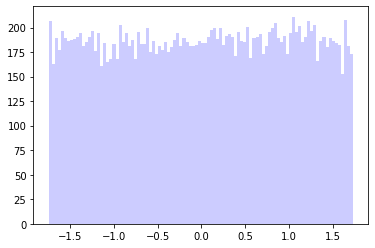

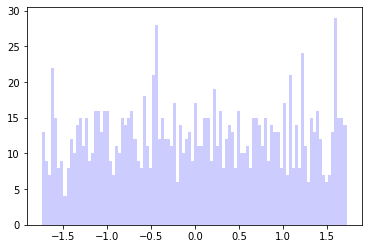

In [ ]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

num_bins = 100
n, bins, patches = plt.hist(f[:, 3], num_bins, facecolor='blue', alpha=0.2)
plt.show()
n, bins, patches = plt.hist(t[:, 3], num_bins, facecolor='blue', alpha=0.2)
plt.show()

I haven't still reached a good performance but I have no more time and should share the link for Rahnama college challenge